In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import cbor2

In [4]:
ls ../data

2025-07-11_05-39_noaa_apt_137.1 MHz/
product.cbor
Re Mini workshop update (Forthare).zip
samunicipal.geojson
south_africa_District_Municipalities_level_2/
test_cbor.py


In [5]:


# Read CBOR file
with open("../data/2025-07-11_05-39_noaa_apt_137.1 MHz/product.cbor", "rb") as f:
    data = cbor2.load(f)

# Inspect the result
print(type(data))
print(data)

<class 'dict'>
{'bit_depth': 8, 'calibration': {'calibrator': 'noaa_avhrr3', 'default_range': [{'max': 1.0, 'min': 0.0}, {'max': 1.0, 'min': 0.0}, {'max': 1.0, 'min': 0.0}, {'max': 1.0, 'min': 0.05}, {'max': 120.0, 'min': 30.0}, {'max': 120.0, 'min': 30.0}], 'type': [0, 0, 0, 1, 1, 1], 'vars': {'perChannel': [{'int_hi': -57.14, 'int_lo': -2.19, 'slope_hi': 0.1662, 'slope_lo': 0.05635, 'wavnb': 15784.2371}, {'int_hi': -69.89, 'int_lo': -2.636, 'slope_hi': 0.2024, 'slope_lo': 0.06796, 'wavnb': 12118.891}, {'int_hi': -2.69, 'int_lo': -0.036, 'slope_hi': 0.0062, 'slope_lo': 0.0009, 'wavnb': 6211.8197}, {'A': 1.67396, 'B': 0.997364, 'Ns': 0, 'Vc': 2670.0, 'b': [0, 0, 0], 'wavnb': 2671.6576}, {'A': 0.53959, 'B': 0.998534, 'Blb': 113, 'Nbb': 94.03110910294207, 'Ns': -5.49, 'Spc': 248, 'Vc': 928.9, 'b': [5.7, -0.11187, 0.00054668], 'wavnb': 927.8562}, {'A': 0.36064, 'B': 0.998913, 'Ns': -3.39, 'Vc': 831.9, 'b': [3.58, -0.05991, 0.00024985], 'wavnb': 831.1655}]}, 'wavenumbers': [15784.2371, 121

In [9]:
url = "../data/samunicipal.geojson"
gdf = gpd.read_file(url)
gdf.head()

,shape2,shapeiso,shapeid,shapegroup,shapetype,gid,shape1,shape0,geometry
0,Ekurhuleni,,47623444B61881803671589,ZAF,ADM2,18,Gauteng,south africa,"MULTIPOLYGON (((28.0671 -26.34194, 28.0671 -26..."
1,eThekwini,,47623444B60178842862169,ZAF,ADM2,19,KwaZulu-Natal,south africa,"MULTIPOLYGON (((31.18575 -29.57178, 31.18573 -..."
2,Fezile Dabi,,47623444B21501715606105,ZAF,ADM2,20,Free State,south africa,"MULTIPOLYGON (((26.52162 -27.10439, 26.52176 -..."
3,Frances Baard,,47623444B47551800403987,ZAF,ADM2,21,Nothern Cape,south africa,"MULTIPOLYGON (((24.111 -27.73898, 24.10954 -27..."
4,Gert Sibande,,47623444B27645248540404,ZAF,ADM2,22,Mpumalanga,south africa,"MULTIPOLYGON (((30.44827 -27.32774, 30.44864 -..."


In [10]:
# Set shape2 as the index for easier reference
gdf = gdf.set_index("shape2")

## Calculate the area
gdf["area"] = gdf.area
gdf

/var/folders/v0/v_qnst7n3hn5fdcjh69y2qvm0000gn/T/ipykernel_55864/3735062401.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["area"] = gdf.area


,shapeiso,shapeid,shapegroup,shapetype,gid,shape1,shape0,geometry,area
shape2,,,,,,,,,
Ekurhuleni,,47623444B61881803671589,ZAF,ADM2,18,Gauteng,south africa,"MULTIPOLYGON (((28.0671 -26.34194, 28.0671 -26...",0.178388
eThekwini,,47623444B60178842862169,ZAF,ADM2,19,KwaZulu-Natal,south africa,"MULTIPOLYGON (((31.18575 -29.57178, 31.18573 -...",0.238578
Fezile Dabi,,47623444B21501715606105,ZAF,ADM2,20,Free State,south africa,"MULTIPOLYGON (((26.52162 -27.10439, 26.52176 -...",1.884909
Frances Baard,,47623444B47551800403987,ZAF,ADM2,21,Nothern Cape,south africa,"MULTIPOLYGON (((24.111 -27.73898, 24.10954 -27...",1.180796
Gert Sibande,,47623444B27645248540404,ZAF,ADM2,22,Mpumalanga,south africa,"MULTIPOLYGON (((30.44827 -27.32774, 30.44864 -...",2.887058
iLembe,,47623444B69150070479938,ZAF,ADM2,23,KwaZulu-Natal,south africa,"MULTIPOLYGON (((31.18575 -29.57178, 31.18592 -...",0.303508
Joe Gqabi,,47623444B23123045321242,ZAF,ADM2,24,Eastern Cape,south africa,"MULTIPOLYGON (((28.26877 -30.37373, 28.26847 -...",2.417897
John Taolo Gaetsewe,,47623444B84629172160693,ZAF,ADM2,25,Nothern Cape,south africa,"MULTIPOLYGON (((22.63217 -26.12128, 22.63196 -...",2.485443
Lejweleputswa,,47623444B29116896592790,ZAF,ADM2,26,Free State,south africa,"MULTIPOLYGON (((25.83024 -27.56619, 25.83017 -...",2.968556


In [11]:
gdf[gdf['shape1']=='Eastern Cape']

,shapeiso,shapeid,shapegroup,shapetype,gid,shape1,shape0,geometry,area
shape2,,,,,,,,,
Joe Gqabi,,47623444B23123045321242,ZAF,ADM2,24,Eastern Cape,south africa,"MULTIPOLYGON (((28.26877 -30.37373, 28.26847 -...",2.417897


In [14]:
# Get the boundary of each polygon
gdf["boundary"] = gdf.boundary

# Get the centroid of each polygon
gdf["centroid"] = gdf.centroid

gdf[["boundary", "centroid"]]

/var/folders/v0/v_qnst7n3hn5fdcjh69y2qvm0000gn/T/ipykernel_55864/392734138.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["centroid"] = gdf.centroid


,boundary,centroid
shape2,,
Ekurhuleni,"MULTILINESTRING ((28.0671 -26.34194, 28.0671 -...",POINT (28.31261 -26.1989)
eThekwini,"MULTILINESTRING ((31.18575 -29.57178, 31.18573...",POINT (30.83614 -29.83422)
Fezile Dabi,"MULTILINESTRING ((26.52162 -27.10439, 26.52176...",POINT (27.71927 -27.33918)
Frances Baard,"MULTILINESTRING ((24.111 -27.73898, 24.10954 -...",POINT (24.38188 -28.30003)
Gert Sibande,"MULTILINESTRING ((30.44827 -27.32774, 30.44864...",POINT (29.92953 -26.671)
iLembe,"MULTILINESTRING ((31.18575 -29.57178, 31.18592...",POINT (31.14253 -29.27326)
Joe Gqabi,"MULTILINESTRING ((28.26877 -30.37373, 28.26847...",POINT (27.05769 -30.94198)
John Taolo Gaetsewe,"MULTILINESTRING ((22.63217 -26.12128, 22.63196...",POINT (23.04638 -27.04638)
Lejweleputswa,"MULTILINESTRING ((25.83024 -27.56619, 25.83017...",POINT (26.14439 -28.23951)


## Measuring Distance
We can also measure the distance from each borough's centroid to a reference point, such as the centroid of Manhattan.

In [15]:
# Use Joe Gqabi's centroid as the reference point
joe_gqabi_centroid = gdf.loc["Joe Gqabi", "centroid"]

# Calculate the distance from each centroid to Joe Gqabi's centroid
gdf["distance_to_joe_gqabi"] = gdf["centroid"].distance(joe_gqabi_centroid)
gdf[["centroid", "distance_to_joe_gqabi"]]

/var/folders/v0/v_qnst7n3hn5fdcjh69y2qvm0000gn/T/ipykernel_55864/215740504.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["distance_to_joe_gqabi"] = gdf["centroid"].distance(joe_gqabi_centroid)


,centroid,distance_to_joe_gqabi
shape2,,
Ekurhuleni,POINT (28.31261 -26.1989),4.906278
eThekwini,POINT (30.83614 -29.83422),3.937483
Fezile Dabi,POINT (27.71927 -27.33918),3.663032
Frances Baard,POINT (24.38188 -28.30003),3.760297
Gert Sibande,POINT (29.92953 -26.671),5.146717
iLembe,POINT (31.14253 -29.27326),4.412535
Joe Gqabi,POINT (27.05769 -30.94198),0.000000
John Taolo Gaetsewe,POINT (23.04638 -27.04638),5.591625
Lejweleputswa,POINT (26.14439 -28.23951),2.852621


## Calculating Mean Distance
We can calculate the mean distance between the borough centroids and Joe Gqabi

In [16]:
mean_distance = gdf["distance_to_joe_gqabi"].mean()
print(f"Mean distance to Joe Gqabi: {mean_distance} units")

Mean distance to Joe Gqabi: 3.5974724604739508 units


## Plotting Geospatial Data
GeoPandas integrates with Matplotlib for easy plotting of geospatial data. Let's create some maps to visualize the data.

### Plotting the Area of Each Borough
We can color the boroughs based on their area and display a legend:

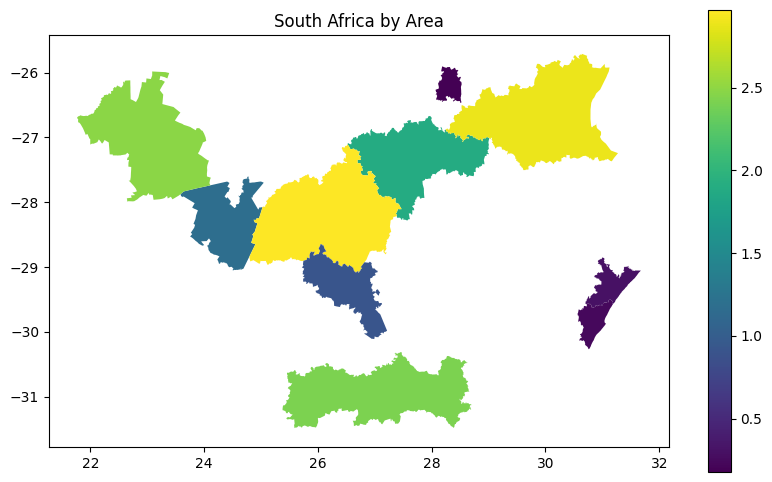

In [17]:
gdf.plot("area", legend=True, figsize=(10, 6))
plt.title("South Africa by Area")
plt.show()

## Plotting Centroids and Boundaries
We can also plot the centroids and boundaries:

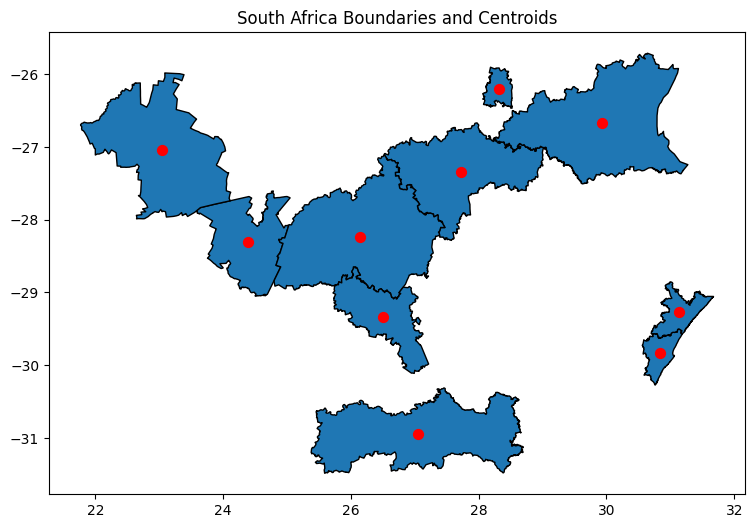

In [18]:
# Plot the boundaries and centroids
ax = gdf["geometry"].plot(figsize=(10, 6), edgecolor="black")
gdf["centroid"].plot(ax=ax, color="red", markersize=50)
plt.title("South Africa Boundaries and Centroids")
plt.show()

You can also explore your data interactively using `GeoDataFrame.explore()`, which behaves in the same way `plot()` does but returns an interactive map instead.

In [20]:
gdf.explore("area", legend=False)